## Load Libraries

In [1]:
## Plotting Libaray
import matplotlib.pyplot as plt ## used for creating Graphs and charts
import seaborn as sns ## used for creating Graphs and charts
import plotly.express as px
## Pandas Dataframe Library
import pandas as pd
## Numpy Library
import numpy as np ## used for methamtical compution and handle multi-dimensional arrays and matrices
## Train and Test Split
from sklearn.model_selection import train_test_split
## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Normalize
from sklearn.preprocessing import StandardScaler
## Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as XGBClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.optimizers import *
## Kfold and ROC
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix,auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV
## Sampling Technique
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Importing dataset


In [2]:
df = pd.read_csv (r'/content/healthcare-dataset-stroke-data.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Number of Rows and Columns

In [4]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 5110
Number of Columns: 12


## Columns

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Type of Columns

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Description for Categorical Columns

## Following info is deduced from it

* Using mean we can deduced that 4 % of the people have stokes as per the dataset.
* Avg. age t is 43 year
* Only 5% had Heart related isssue.
* Avg BMI is 28 and glucose level is 106.


In [8]:
df.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Following Info is deduced from it
*  Most of the patients were are marrried
*  Most of the patients work in private sector
*  Most of the patient haven't smoked
* Most of the patients lived in urban areas

## Data Info Checking any Null Value

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Bmi has many null values there are different ways to handle it which are**



*   Remove all null rows
*   Use interpolation
*   fill value with mean



We will use Interpolation for handling the null value as it handle both object and numeric values easily

Two interpolation method will be used

* Interpolation through padding (Interpolation through padding means copying the value just before a missing entry)

* Linear Interpolation

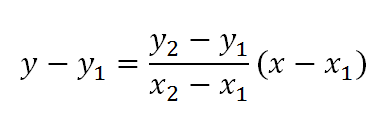

In [10]:
## The methatical model of linear interpolation is performed on the dataframe to handle data linearly
df = df.interpolate()

In [11]:
## Padding Interpolation is used to fill in the gaps left by Linear Interpolation. When using padding interpolation, you must set a limit, which is the maximum amount of nans the technique may fill in a row.
df = df.interpolate(method='pad', limit=15)

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Analysis

## Storke Cases

In [13]:
## Stoke Cases
cases= df['stroke'].value_counts()
cases

0    4861
1     249
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

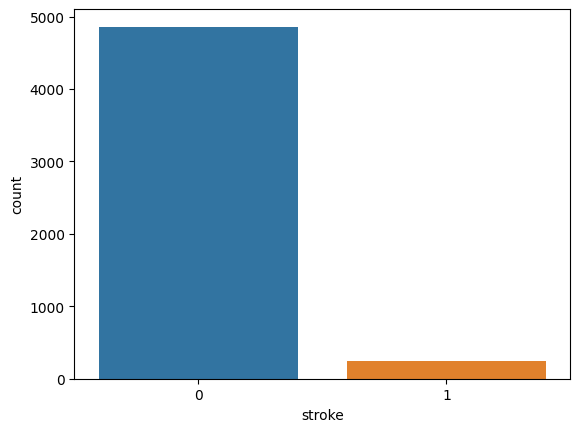

In [14]:
sns.countplot(x = df['stroke'])

## Number of Male and Female in Dataset

In [15]:
## Total Genders
sex= df['gender'].value_counts()
sex

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## Removing single other value

In [16]:
df = df[(df.gender != 'Other')]

<Axes: xlabel='gender', ylabel='count'>

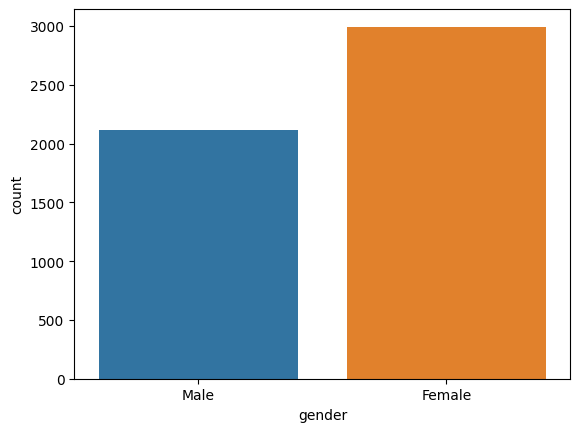

In [17]:
sns.countplot(x = df['gender'])

## Type of Work people doing

In [18]:
## Plot work type
fig = px.pie(df, values=df['work_type'].value_counts().values, names=df['work_type'].value_counts().index,
             title='Work type' ,
             color_discrete_sequence=px.colors.sequential.Cividis_r
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Checking Percentage of Males and Females with heart dieases

Visualizing Males and Females heart disease By Pie Plot


In [19]:
## Plot Heart diesase w.r.t gender
fig = px.pie(df, values='heart_disease', names='gender',
             title='Percentage of Heart Diease w.r.t to Gender' ,
             color_discrete_sequence=px.colors.sequential.Aggrnyl
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Patients with Hyper tension or not w.r.t to stroke
Visualizing Hyper tension and Non Hyper Tension having stroke


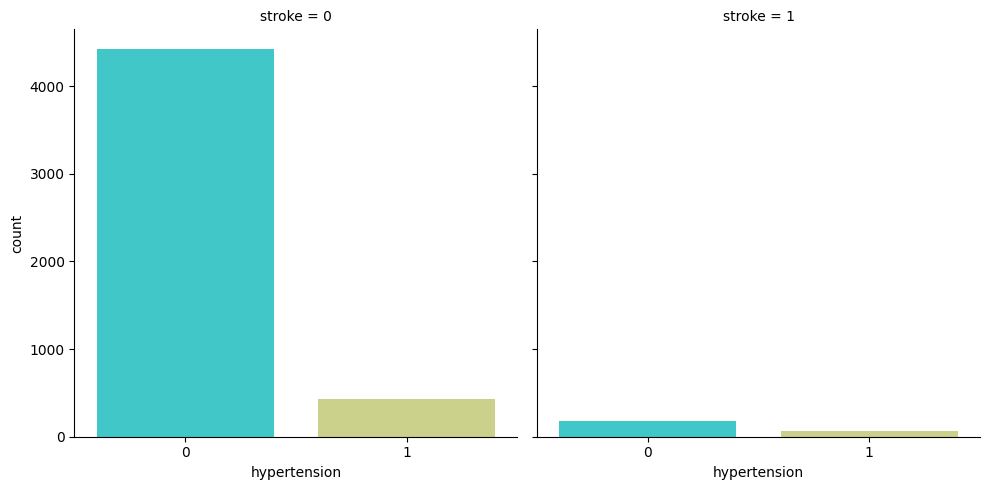

In [20]:
## Plot Hyper tension w.r.t gender
sns.catplot(x="hypertension", col = 'stroke', data=df, kind = 'count', palette='rainbow')

## Visualizing either people from Urban or Rural People have stroke issues


In [21]:
pd.crosstab([df["Residence_type"]], df["stroke"], margins = True).style.background_gradient(cmap = "rainbow")

stroke,0,1,All
Residence_type,,,
Rural,2399,114,2513
Urban,2461,135,2596
All,4860,249,5109


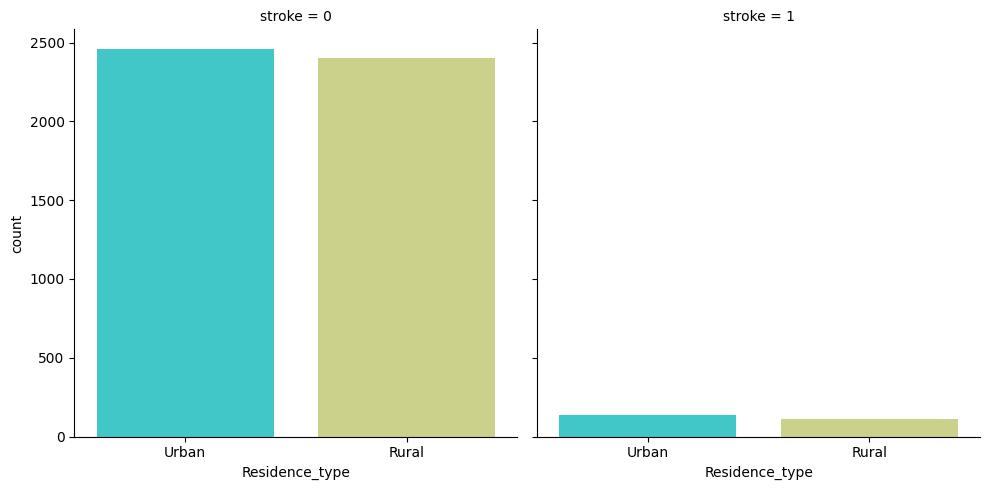

In [22]:
## Plot Residence_type w.r.t Stroke
sns.catplot(x="Residence_type", col = 'stroke', data=df, kind = 'count', palette='rainbow')

## Stroke w.r.t Age

## this Show at people after 70 has more strokes and espacially in females

In [23]:
## fetching only people with stoke
sdfs = df[(df.stroke == 1)]

In [24]:
## Ploting Graph of stroke w.r.t to gender and stoke
fig = px.histogram(sdfs, x="age", y="stroke", color="gender",
                   hover_data=sdfs.columns ,
                   title = 'Sum Of Deaths With Respect to Specific Age and Gender' ,
                   color_discrete_sequence=px.colors.sequential.Blackbody,
                   width=900 ,
                   height=600)
fig.show()

In [25]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


## Avg Gluscose rate w.r.t to age and gender

* showing womens have the high percentage of avg high glucose as there age increases

In [26]:
fig = px.pie(sdfs, values='avg_glucose_level', names='age',
             title='Avg Glucose Effect on Death Event' ,
             color = 'gender'
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Vislulizing how many %Percentage of people having Hypetension and heart diease lead to Stroke

In [27]:
fig = px.bar(df, x="hypertension", y="heart_disease", color="gender", barmode="group",facet_col="stroke",
             )
fig.show()

## At What Values BMI Is Causing More Deaths Visualizing By Hist

* For both male and female people ate the average bmi range of 25-30 have high number of stroke cases

In [28]:
fig = px.histogram(sdfs, x="bmi", y = 'stroke' , color="gender",
                   title = 'bmi and stroke Graph' ,
                   color_discrete_sequence=px.colors.sequential.Blackbody,
                   width=900 ,
                   height=600 ,
                   hover_data=sdfs.columns)
fig.show()

## Apply Person Correlation

The correlation coefficient has a range of values from -1 to 1.

* A number near 0 indicates a lesser connection (precise 0 indicates no association).
* A value near 1 indicates a stronger positive correlation.

* A number nearer to -1 denotes a more pronounced negative correlation.

Formula is as follows:

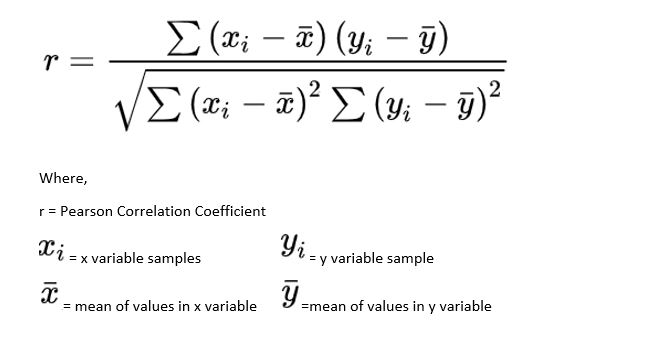




<ipython-input-29-597358ff2559>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-29-597358ff2559>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-29-597358ff2559>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



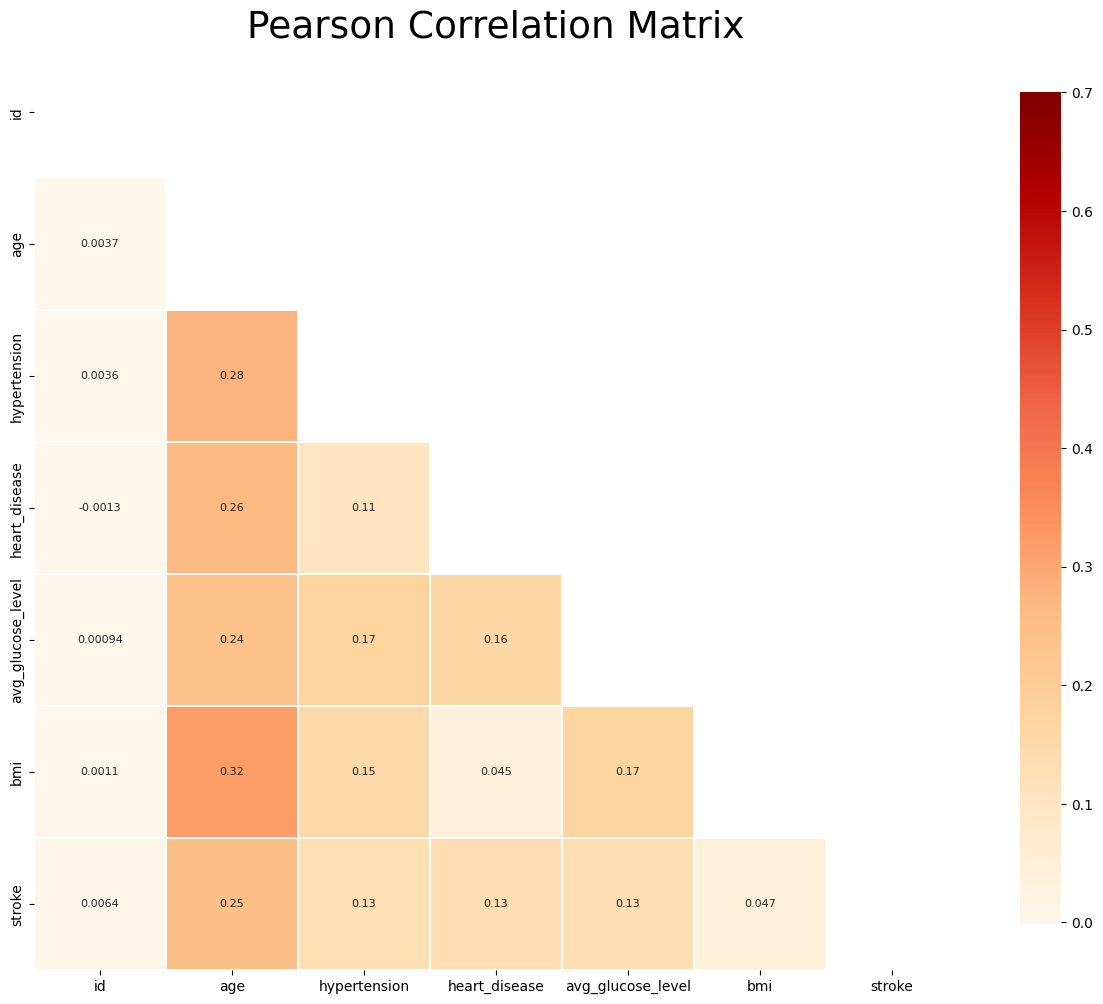

In [29]:
features = df.columns ## Fetching all Features Column names
## Applying Pearson Correaltion
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
## Creating a Plot Diagram
f, ax = plt.subplots(figsize=(16, 12))
## Title of Plot
plt.title('Pearson Correlation Matrix',fontsize=27)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd",
linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## Categorical Encoder

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [31]:
column = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [32]:
le = preprocessing.LabelEncoder()
categ = list(df.select_dtypes(include=['object']).columns)

In [33]:
# Encode Categorical Columns
df[column] = df[column].apply(le.fit_transform)

## Stroke Preditction

In [34]:
## Split dataset
x = df.drop(['id','stroke'],axis=1)
y = df[[ 'stroke']]

## Normalizing data

In [35]:
# Get column names first
names = x.columns
# Create the Scaler object
sc = StandardScaler()
# Fit your data on the scaler object
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=names)

## CLass Balancing

###  WE can see that from visulization the data is highly imbalance which eventully lead to overfiting during the training phase So to save the model from that we gonna use imbalancing technqiue to solve it i.e : oversampling and undersampling

*   SOMTE (OverSampling)
*   RandomUnderSampler (Undersampling)



In [36]:
## Class Balancing
over = SMOTE()
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)

## Train and Test Split

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Machine Learning Model Training

##Models: SVM , GaussianNB, MLPClassifier, LogisticRegression

In [63]:
svc = SVC(random_state =7,probability=True)
nb = GaussianNB()
mlp=MLPClassifier(random_state =7)
lr=LogisticRegression(random_state =7)

##ML Model Training

In [64]:
classifiers = [svc, nb, mlp, lr]
results = []

for classifier in classifiers:
    classifier.fit(xtrain, ytrain)
    y_pred = classifier.predict(xtest)
    results.append(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1

##ML Model Evaluation

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
metrics = {
    "Classifier": ["SVC", "GaussianNB", "MLP", "LogisticRegression"],
    "Accuracy": [accuracy_score(ytest, y_pred) for y_pred in results],
    "Precision": [precision_score(ytest, y_pred) for y_pred in results],
    "Recall": [recall_score(ytest, y_pred) for y_pred in results],
    "F1-Score": [f1_score(ytest, y_pred) for y_pred in results]
}

metrics_df = pd.DataFrame(metrics)

Classifier: SVC
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       976
           1       0.80      0.93      0.86       965

    accuracy                           0.85      1941
   macro avg       0.86      0.85      0.85      1941
weighted avg       0.86      0.85      0.85      1941

[[753 223]
 [ 72 893]]


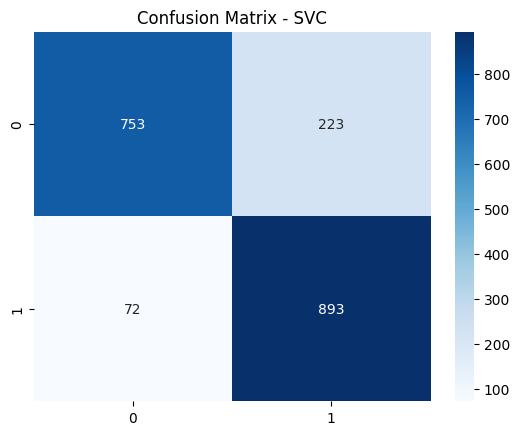

Classifier: GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       976
           1       0.74      0.83      0.78       965

    accuracy                           0.77      1941
   macro avg       0.78      0.77      0.77      1941
weighted avg       0.78      0.77      0.77      1941

[[696 280]
 [162 803]]


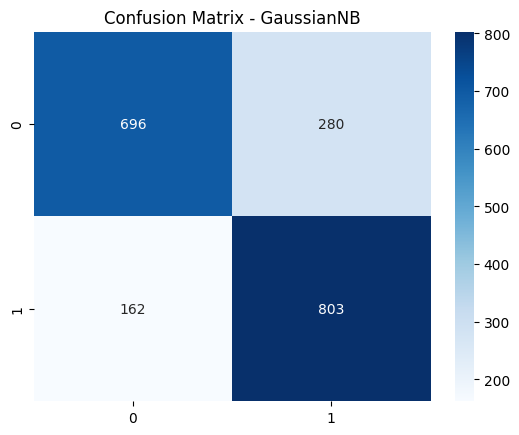

Classifier: MLP
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       976
           1       0.86      0.94      0.90       965

    accuracy                           0.90      1941
   macro avg       0.90      0.90      0.90      1941
weighted avg       0.90      0.90      0.90      1941

[[833 143]
 [ 54 911]]


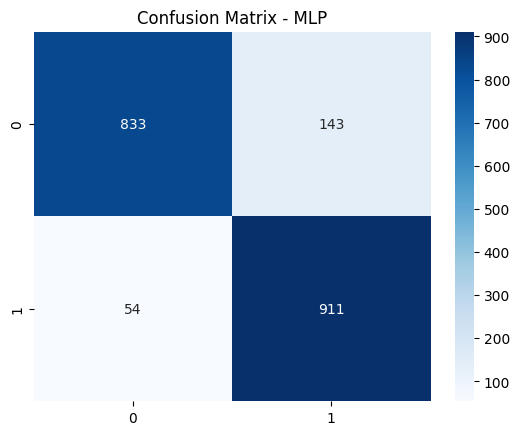

Classifier: LogisticRegression
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       976
           1       0.76      0.85      0.80       965

    accuracy                           0.79      1941
   macro avg       0.80      0.79      0.79      1941
weighted avg       0.80      0.79      0.79      1941

[[719 257]
 [144 821]]


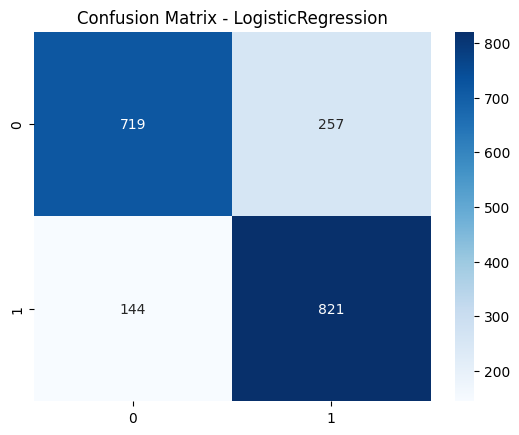

In [66]:
for i, classifier in enumerate(classifiers):
    print(f"Classifier: {metrics_df['Classifier'][i]}")
    print(classification_report(ytest, results[i]))
    cm = confusion_matrix(ytest, results[i])
    print(cm)
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {metrics_df["Classifier"][i]}')
    plt.show()

##Compairison of ML Models

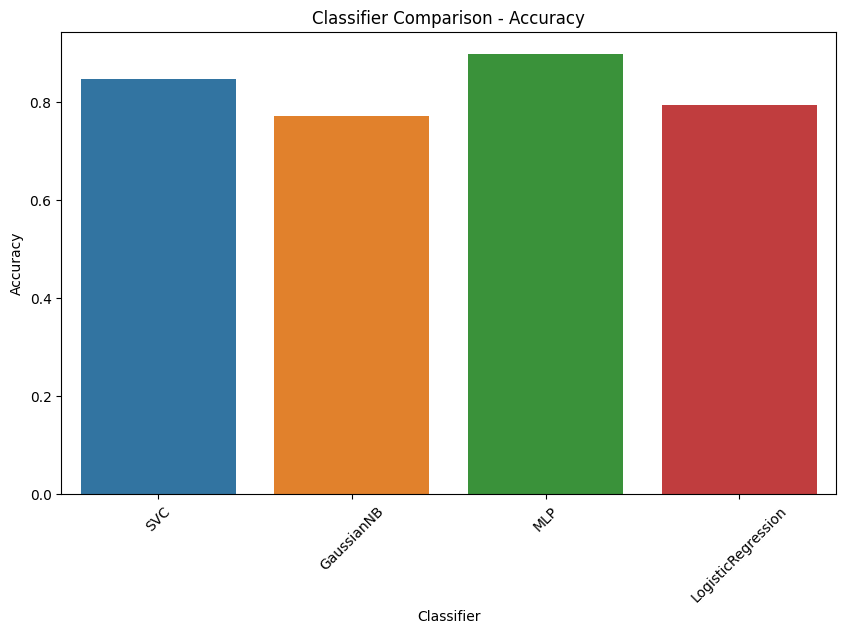

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

##Deep Learning Models (Keras Classifier)

In [ ]:
!pip install scikeras

In [68]:
from scikeras.wrappers import KerasClassifier

In [69]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [103]:
from keras.wrappers.scikit_learn import KerasClassifier

def twoLayerFeedForward():
    clf = Sequential()
    clf.add(Dense(64, activation='relu', input_dim=10))
    clf.add(Dropout(rate=0.2))
    clf.add(Dense(32, activation='relu'))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return clf

clf = KerasClassifier(twoLayerFeedForward, epochs=100, batch_size=32, verbose=0)
clf._estimator_type = "classifier"

<ipython-input-103-6b774055913f>:12: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



##Training Deep Learning Model

In [104]:
clf.fit(xtrain, ytrain)

## Evaluation Deep Learning Model

61/61 [==============================] - 0s 2ms/step
Accuracy: 0.9170530654301906
Precision: 0.8641304347826086
Recall: 0.9886010362694301
F1-Score: 0.9221846302561625
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       976
           1       0.86      0.99      0.92       965

    accuracy                           0.92      1941
   macro avg       0.93      0.92      0.92      1941
weighted avg       0.93      0.92      0.92      1941



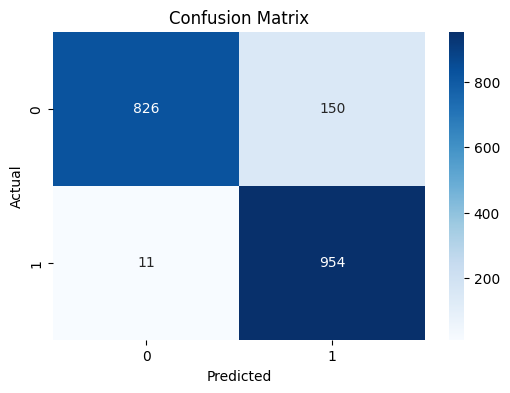

In [105]:
ypred = clf.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Classification Report:\n", classification_report(ytest, ypred))
conf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [115]:
keras_metrics = {
    "Classifier": "KerasClassifier",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

In [116]:
metrics_df = metrics_df.append(keras_metrics, ignore_index=True)


<ipython-input-116-4be6d2664f8a>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Ensemble Model

In [106]:
params = {'voting':['soft'],
          'weights':[(1,1,1,1,1,1,1), (2,1,1,1,1,1,1),
                     (1,2,1,1,1,1,1), (1,1,2,1,1,1,1),
                     (1,1,1,2,1,1,1), (1,1,1,1,2,1,1),
                     (1,1,1,2,2,1,1), (2,1,1,1,2,1,1)]}

In [111]:
from sklearn.ensemble import VotingClassifier

estimators= [("svc", svc), ("nb", nb),("mlp", mlp), ("lr", lr),('clf',clf)]
ensemble = VotingClassifier(estimators,voting='soft',weights=(0.5,0.1,3,0.1,5))

## Train Ensemble Model

In [112]:
ensemble.fit(xtrain, ytrain.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



VotingClassifier(estimators=[('svc', SVC(probability=True, random_state=7)),
                             ('nb', GaussianNB()),
                             ('mlp', MLPClassifier(random_state=7)),
                             ('lr', LogisticRegression(random_state=7)),
                             ('clf',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7bf2106d4b50>)],
                 voting='soft', weights=(0.5, 0.1, 3, 0.1, 5))

## Prediction

In [113]:
## Model Prediction
pred = ensemble.predict(xtest)

61/61 [==============================] - 0s 2ms/step


In [114]:
print( "Test Accuracy : " , accuracy_score(ytest,pred)*100 , "%" )

Test Accuracy :  91.9629057187017 %


##Evaluation of Ensemble Model

In [127]:
# Make predictions on the test data and calculate the evaluation metrics
ypred = ensemble.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

61/61 [==============================] - 0s 1ms/step
Accuracy: 0.919629057187017
Precision: 0.8748841519925857
Recall: 0.9782383419689119
F1-Score: 0.9236790606653621


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       976
           1       0.87      0.98      0.92       965

    accuracy                           0.92      1941
   macro avg       0.93      0.92      0.92      1941
weighted avg       0.93      0.92      0.92      1941

[[841 135]
 [ 21 944]]


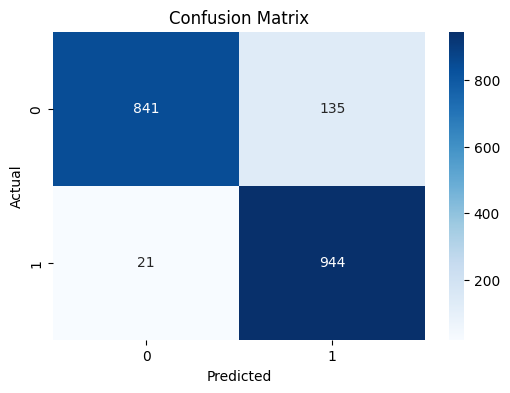

In [131]:
print("Classification Report:\n", classification_report(ytest, ypred))
conf_matrix = confusion_matrix(ytest, ypred)
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [124]:
# Create a dictionary with VotingClassifier metrics
voting_metrics = {
    "Classifier": "VotingClassifier",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

In [125]:
# Append VotingClassifier metrics to the metrics_df DataFrame
metrics_df = metrics_df.append(voting_metrics, ignore_index=True)

<ipython-input-125-d69408830aff>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



##Results Comparision of all models

In [126]:
metrics_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,SVC,0.848016,0.800179,0.925389,0.858241
1,GaussianNB,0.772282,0.741459,0.832124,0.784180
2,MLP,0.898506,0.864326,0.944041,0.902427
3,LogisticRegression,0.793405,0.761596,0.850777,0.803720
4,KerasClassifier,0.917053,0.864130,0.988601,0.922185
5,VotingClassifier,0.919629,0.874884,0.978238,0.923679


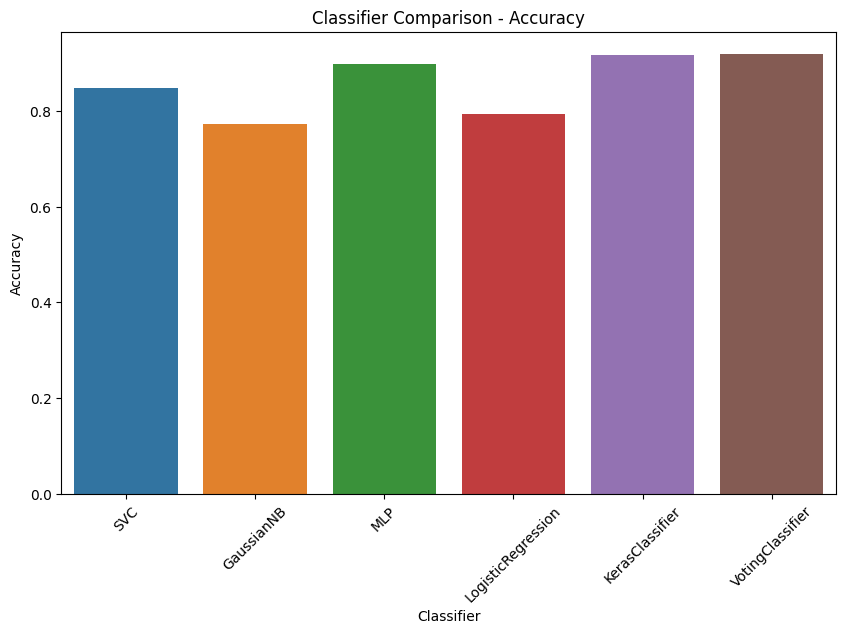

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

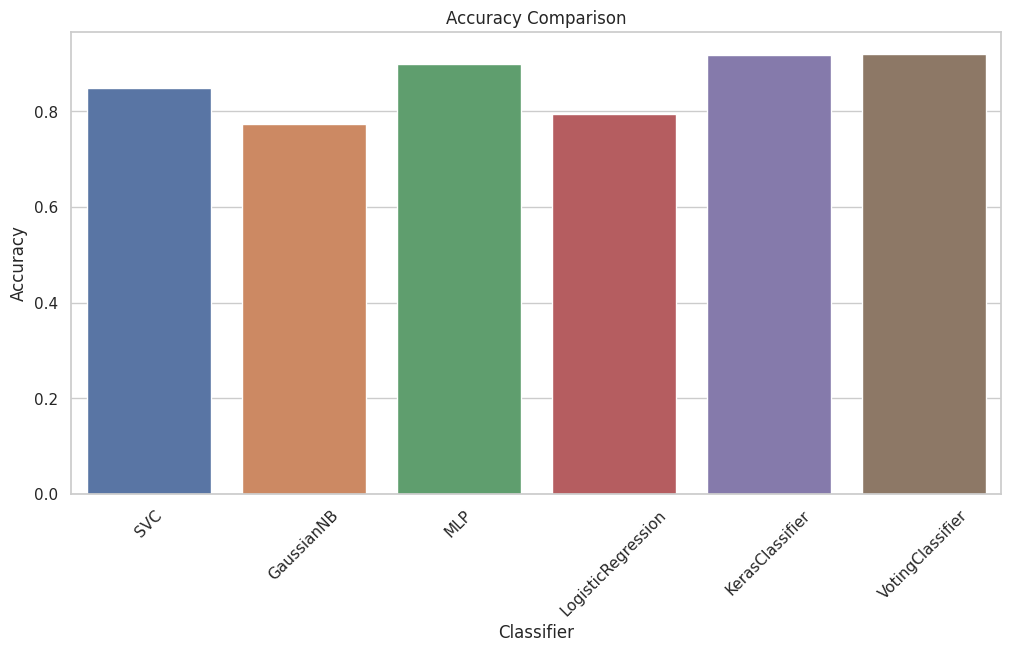

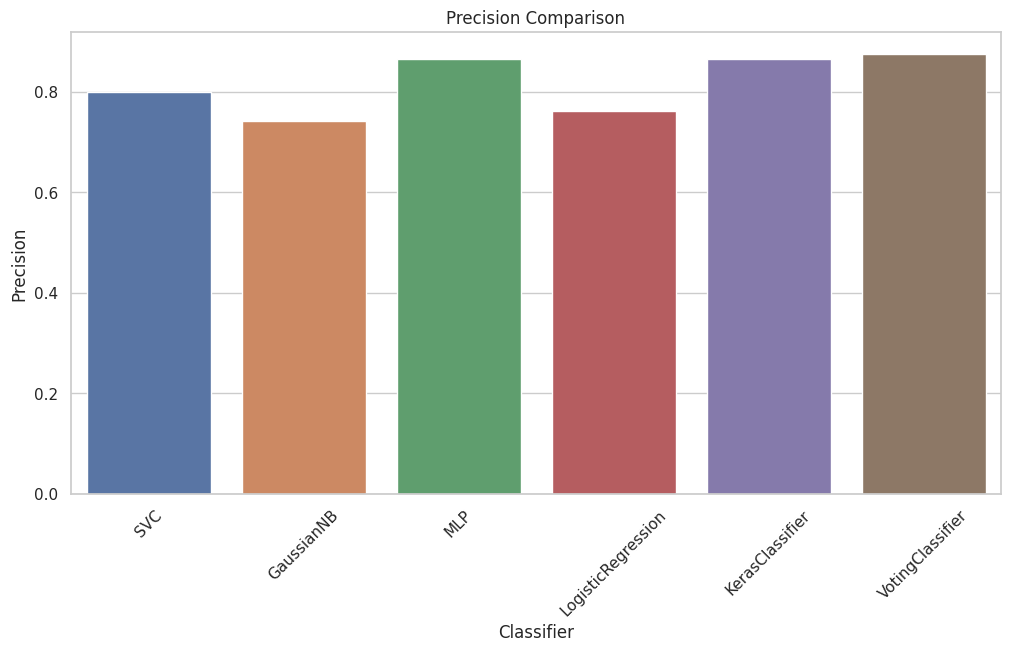

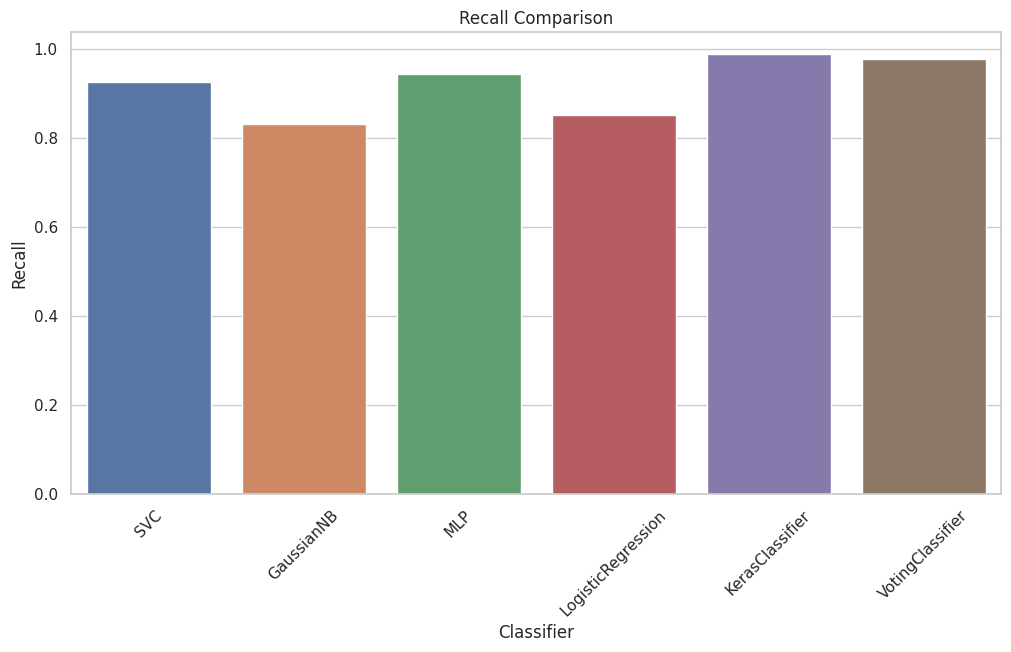

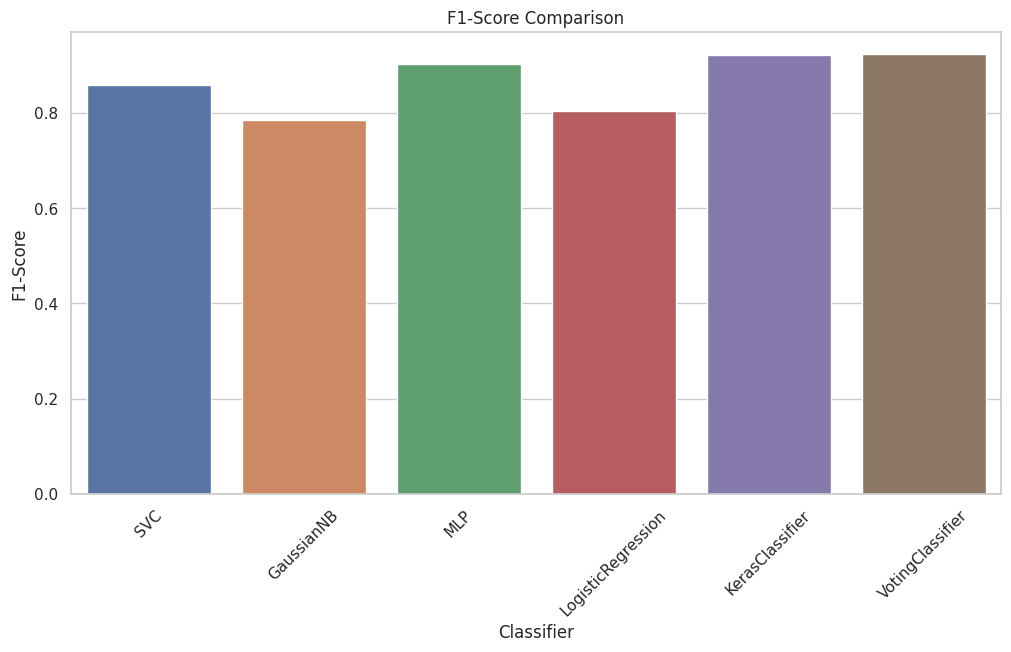

In [133]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for precision
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Precision', data=metrics_df)
plt.title('Precision Comparison')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Recall', data=metrics_df)
plt.title('Recall Comparison')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='F1-Score', data=metrics_df)
plt.title('F1-Score Comparison')
plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()